In [1]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt

# Exercise 10.2

In this exercise notebook, we shall try to answer Exercise 10.2.

Your first task is to define two functions. The first function, p(t, tau) calculates the probability that a single particle with a half-life tau (in units of seconds) would decay after t seconds with
\begin{equation}
p(t; \tau) = 1 - 2^{-t/\tau}
\end{equation}

The second function, check_decay(t, tau), would use a randomly generated floating point $x$ (using rn.random) to implement the following function
\begin{equation}
\textrm{check_decay}(t, \tau) = \left\lbrace
\begin{matrix}
0 \leq x \leq p(t; \tau) & \textrm{return True} \\
p(t; \tau) < x & \textrm{return False} \\
\end{matrix}
\right.
\end{equation}

In [2]:
def p(t, tau):
    return 1-2**(-t/tau)
    
def check_decay(t, tau):
    x = rn.random()
    return x < p(t, tau)

These functions would most likely pass the following tests (after 1 second, half the atoms with a half-life of 1 second should decay)

In [3]:
N = 10_000
error = 0.1
tau = 1
t = 1
decay_pop = 0
for _ in range(N):
    if check_decay(t, tau):
        decay_pop += 1
        N -= 1

assert abs(N - decay_pop)/N < error ## the population of N and decay_pop should be almost equal after a half-life

Next, write two functions, update_PbBi(t, Pb209_pop, Bi209_pop) and update_TlPb(t, Pb209_pop, Bi209_pop). These two functions does essentially the same thing.

update_PbBi goes through each atom of Pb-209 (with the number of atoms given by Pb209_pop), and uses check_decay to determine whether or not each individual atom decays or not. If a Pb-209 atom decays, Pb209_pop is decreased by 1 while Bi209_pop is increased by 1. The new values of Pb209_pop and Bi209_pop is returned.

The same is done for update_TlPb. Note that the half-life of Pb-209 atoms is 198 seconds while the half-life of Tl-209 is 132 seconds.

In [4]:
def update_PbBi(t, Pb209_pop, Bi209_pop):
    decay_pop = sum(check_decay(t, 198) for _ in range(Pb209_pop))
    Pb209_pop -= decay_pop
    Bi209_pop += decay_pop
    return Pb209_pop, Bi209_pop

def update_TlPb(t, Tl209_pop, Pb209_pop):
    decay_pop = sum(check_decay(t, 132) for _ in range(Tl209_pop))
    Tl209_pop -= decay_pop
    Pb209_pop += decay_pop
    return Tl209_pop, Pb209_pop

These functions should pass the following tests (based on half-lives of Pb and Tl)

In [5]:
Pb209_pop = 100_000
Bi209_pop = 0
error = 0.01
t = 198*2

Pb209_pop, Bi209_pop = update_PbBi(t, Pb209_pop, Bi209_pop)

assert abs(Pb209_pop*3 - Bi209_pop)/(Pb209_pop+Bi209_pop) < error 
## after two half-lives, the ratio between Pb_atoms and Bi atoms should be 1:3

In [6]:
Tl209_pop = 100_000
Pb209_pop = 0
error = 0.01
t = 132*3

Tl209_pop, Pb209_pop = update_TlPb(t, Tl209_pop, Pb209_pop)

assert abs(7*Tl209_pop - Pb209_pop)/(Tl209_pop - Pb209_pop) < error 
## after three half-lives, the ratio between Tl atoms and Pb atoms should be 1:7

In the following, define two new functions. The first function, decide_Bidecay() uses a randomly generated floating point 𝑥 (using rn.random) to implement the following function
\begin{equation}
\textrm{decide_Bidecay}() = \left\lbrace
\begin{matrix}
0 \leq x \leq 0.0209 & \textrm{return 'Tl'} \\
0.0209 < x & \textrm{return 'Pb'}
\end{matrix}
\right.
\end{equation}
The second function, update_BiTlPb(t, Bi213_pop, Tl209_pop, Pb209_pop), which does something similar as update_PbBi and update_TlPb except that after a Bi-213 atom has decided that it'll decay, it'll use decide_Bidecay to decide whether the Bi-213 atoms decays into a Tl-209 atom or a Pb-209 atom.

The function update_BiTlPb returns Bi213_pop, Tl209_pop, Pb209_pop in that order.

Note that the half-life of Bi-213 atoms is 2760 seconds.

In [7]:
def decide_Bidecay():
    x = rn.random()
    if x <= 0.0209:
        return 'Tl'
    return 'Pb'

def update_BiTlPb(t, Bi213_pop, Tl209_pop, Pb209_pop):
    decay_pop = sum(check_decay(t, 2760) for _ in range(Bi213_pop))
    Bi213_pop -= decay_pop
    for i in range(decay_pop):
        x = decide_Bidecay()
        if x == 'Tl':
            Tl209_pop += 1
        else: 
            Pb209_pop += 1
    return Bi213_pop, Tl209_pop, Pb209_pop

It should pass the following tests most of the time

In [8]:
Bi213_pop = 1_000_000
Tl209_pop = 0
Pb209_pop = 0
total = Bi213_pop + Tl209_pop + Pb209_pop
error = 0.01
t = 2760

Bi213_pop, Tl209_pop, Pb209_pop = update_BiTlPb(t, Bi213_pop, Tl209_pop, Pb209_pop)

## after a half-life, Bi213_pop should be halved.
assert abs(Bi213_pop - (Tl209_pop + Pb209_pop))/total < error
## after a half-life, the ratio between Tl and Pb atoms should be 2.09:97.91
decay_pop = Tl209_pop + Pb209_pop
assert abs(Tl209_pop*97.91 - Pb209_pop*2.09)/decay_pop < error

We finally have all the tools to answer Exercise 10.2. Starting with a sample consisting of 10,000 Bi-213 atoms, simulate the decay of atoms by dividing time into slices of length $\delta t = 1$ second each and doing the following in order
1. Update the number of Bi-209 and Pb-209 atoms using update_PbBi
2. Update the number of Pb-209 and Tl-209 atoms using update_TlPb
3. Update the number of Bi-213, Tl-209 and Pb-209 atoms using update_BiTlPb

Keep track the number of atoms of each of the four isotopes at all times for 20,000 seconds.

The final output of this notebook should be a plot showing the four numbers as a function of time.

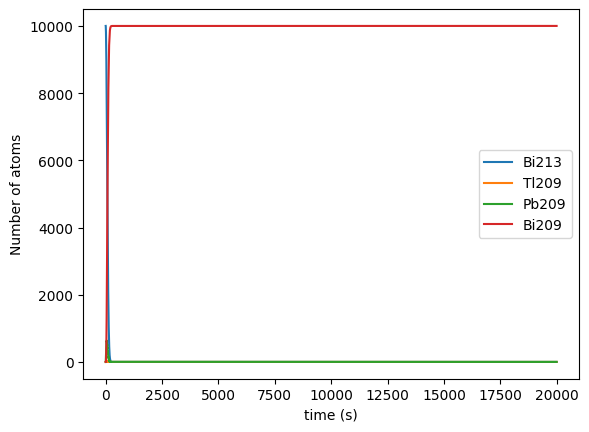

In [10]:
Bi213_points, Tl209_points, Pb209_points, Bi209_points = [10_000], [0], [0], [0]
t_max = 20_000
for t in range(t_max):
    Pb209_pop, Bi209_pop = update_PbBi(t, Pb209_points[t], Bi209_points[t])
    Tl209_pop, Pb209_pop = update_TlPb(t, Tl209_points[t], Pb209_pop)
    Bi213_pop, Tl209_pop, Pb209_pop = update_BiTlPb(t, Bi213_points[t], Tl209_pop, Pb209_pop)
    Bi213_points.append(Bi213_pop)
    Tl209_points.append(Tl209_pop)
    Pb209_points.append(Pb209_pop)
    Bi209_points.append(Bi209_pop)

Bi213_points.pop(0)
Tl209_points.pop(0)
Pb209_points.pop(0)
Bi209_points.pop(0)

t_points = np.arange(0, t_max, 1)
plt.plot(t_points, Bi213_points, label = 'Bi213')
plt.plot(t_points, Tl209_points, label = 'Tl209')
plt.plot(t_points, Pb209_points, label = 'Pb209')
plt.plot(t_points, Bi209_points, label = 'Bi209')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel("Number of atoms")
plt.show()